In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar 
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv('Unemployment in India.csv')
df

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0             11999139.0                                     43.24  Rural  
1             11755881.0                                     42.05  Rural  
2             12086707.0                                     43.50  Rural  
3             12285693.0                                     43.97  Rural  
4             12256762.0                                     44.68  Rural  
..                   ...                                       ...    ...  
763                  NaN                                       NaN    NaN  
764                  NaN                                       NaN    NaN  
765                  NaN                                       NaN    NaN  
766                  NaN                                       NaN    NaN  
767                  NaN                                       NaN    NaN  

[768 rows x 7 columns]

In [3]:
data = pd.read_csv('Unemployment_Rate_upto_11_2020.csv')
data

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98   

      Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0               16635535                                     41.02    South   
1               16545652                                     40.90    South   
2               15881197                                     39.18    South   
3               11336911                                     33.10    South   
4               12988845                                     36.46    South   
..                   ...                                       ...      ...   
262             30726310                                     40.39     East   
263             35372506                                     46.17     East   
264             33298644                                     47.48     East   
265             35707239                                     47.73     East   
266             33962549                                     45.63     East   

     longitude  latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]

In [4]:
# Check for missing values  
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [5]:
# Drop rows with missing values
df = df.dropna()

In [6]:
data.isnull().any()

Region                                      False
 Date                                       False
 Frequency                                  False
 Estimated Unemployment Rate (%)            False
 Estimated Employed                         False
 Estimated Labour Participation Rate (%)    False
Region.1                                    False
longitude                                   False
latitude                                    False
dtype: bool

In [7]:
# Check for duplicates
print(df.duplicated().sum())
print(data.duplicated().sum())

0
0


In [8]:
# Removing spaces before and after the column names
df.columns = df.columns.str.strip()
data.columns = data.columns.str.strip()

In [9]:
df

Region         Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019   Monthly                             3.65   
1    Andhra Pradesh   30-06-2019   Monthly                             3.05   
2    Andhra Pradesh   31-07-2019   Monthly                             3.75   
3    Andhra Pradesh   31-08-2019   Monthly                             3.32   
4    Andhra Pradesh   30-09-2019   Monthly                             5.17   
..              ...          ...       ...                              ...   
749     West Bengal   29-02-2020   Monthly                             7.55   
750     West Bengal   31-03-2020   Monthly                             6.67   
751     West Bengal   30-04-2020   Monthly                            15.63   
752     West Bengal   31-05-2020   Monthly                            15.22   
753     West Bengal   30-06-2020   Monthly                             9.86   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0            11999139.0                                    43.24  Rural  
1            11755881.0                                    42.05  Rural  
2            12086707.0                                    43.50  Rural  
3            12285693.0                                    43.97  Rural  
4            12256762.0                                    44.68  Rural  
..                  ...                                      ...    ...  
749          10871168.0                                    44.09  Urban  
750          10806105.0                                    43.34  Urban  
751           9299466.0                                    41.20  Urban  
752           9240903.0                                    40.67  Urban  
753           9088931.0                                    37.57  Urban  

[740 rows x 7 columns]

In [10]:
data

Region         Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020         M                             5.48   
1    Andhra Pradesh   29-02-2020         M                             5.83   
2    Andhra Pradesh   31-03-2020         M                             5.79   
3    Andhra Pradesh   30-04-2020         M                            20.51   
4    Andhra Pradesh   31-05-2020         M                            17.43   
..              ...          ...       ...                              ...   
262     West Bengal   30-06-2020         M                             7.29   
263     West Bengal   31-07-2020         M                             6.83   
264     West Bengal   31-08-2020         M                            14.87   
265     West Bengal   30-09-2020         M                             9.35   
266     West Bengal   31-10-2020         M                             9.98   

     Estimated Employed  Estimated Labour Participation Rate (%) Region.1  \
0              16635535                                    41.02    South   
1              16545652                                    40.90    South   
2              15881197                                    39.18    South   
3              11336911                                    33.10    South   
4              12988845                                    36.46    South   
..                  ...                                      ...      ...   
262            30726310                                    40.39     East   
263            35372506                                    46.17     East   
264            33298644                                    47.48     East   
265            35707239                                    47.73     East   
266            33962549                                    45.63     East   

     longitude  latitude  
0      15.9129    79.740  
1      15.9129    79.740  
2      15.9129    79.740  
3      15.9129    79.740  
4      15.9129    79.740  
..         ...       ...  
262    22.9868    87.855  
263    22.9868    87.855  
264    22.9868    87.855  
265    22.9868    87.855  
266    22.9868    87.855  

[267 rows x 9 columns]

In [11]:
# View the number of rows and columns
print(f"The dataframe-1 has {df.shape[0]} rows and {df.shape[1]} columns")
print(f"The dataframe-2 has {data.shape[0]} rows and {data.shape[1]} columns")

The dataframe-1 has 740 rows and 7 columns
The dataframe-2 has 267 rows and 9 columns


In [12]:
# Deatailed information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [14]:
df.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       740.000000        7.400000e+02   
mean                         11.787946        7.204460e+06   
std                          10.721298        8.087988e+06   
min                           0.000000        4.942000e+04   
25%                           4.657500        1.190404e+06   
50%                           8.350000        4.744178e+06   
75%                          15.887500        1.127549e+07   
max                          76.740000        4.577751e+07   

       Estimated Labour Participation Rate (%)  
count                               740.000000  
mean                                 42.630122  
std                                   8.111094  
min                                  13.330000  
25%                                  38.062500  
50%                                  41.160000  
75%                                  45.505000  
max                                  72.570000

In [15]:
data.describe()

Estimated Unemployment Rate (%)  Estimated Employed  \
count                       267.000000        2.670000e+02   
mean                         12.236929        1.396211e+07   
std                          10.803283        1.336632e+07   
min                           0.500000        1.175420e+05   
25%                           4.845000        2.838930e+06   
50%                           9.650000        9.732417e+06   
75%                          16.755000        2.187869e+07   
max                          75.850000        5.943376e+07   

       Estimated Labour Participation Rate (%)   longitude    latitude  
count                               267.000000  267.000000  267.000000  
mean                                 41.681573   22.826048   80.532425  
std                                   7.845419    6.270731    5.831738  
min                                  16.770000   10.850500   71.192400  
25%                                  37.265000   18.112400   76.085600  
50%                                  40.390000   23.610200   79.019300  
75%                                  44.055000   27.278400   85.279900  
max                                  69.690000   33.778200   92.937600

In [16]:
data.shape

(267, 9)

In [17]:
data.columns = ['state','date','frequency','estimated unemployment rate','estimated employed','estimated labour participation rate','region','longitude','latitude']
data.columns

Index(['state', 'date', 'frequency', 'estimated unemployment rate',
       'estimated employed', 'estimated labour participation rate', 'region',
       'longitude', 'latitude'],
      dtype='object')

In [18]:
# Changing the datatype of 'date' from object to datetime
data['date'] = pd.to_datetime(data['date'],dayfirst = True)

# Adding Day, Month, and Year
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month_name()
df['Year'] = df['Date'].dt.year

In [19]:
# Extracting month from date attribute
data['month_no'] = data['date'].dt.month

In [20]:
# Convert the integer datatype of month into words for better analysis,
data['month'] = data['month_no'].apply(lambda x: calendar.month_abbr[x])

In [21]:
# Numeric data grouped by months
dt = data.groupby(['month'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
dt = pd.DataFrame(dt).reset_index()
dt

month  estimated unemployment rate  estimated employed  \
0   Apr                    22.236154        1.057020e+07   
1   Aug                    10.313333        1.442904e+07   
2   Feb                     9.266154        1.548827e+07   
3   Jan                     9.196538        1.563720e+07   
4   Jul                     9.834444        1.441802e+07   
5   Jun                    10.911111        1.385739e+07   
6   Mar                    10.782593        1.453866e+07   
7   May                    23.244444        1.150739e+07   
8   Oct                     8.026296        1.457998e+07   
9   Sep                     8.705926        1.458784e+07   

   estimated labour participation rate  
0                            35.297308  
1                            42.390741  
2                            44.180769  
3                            44.626538  
4                            42.274815  
5                            41.203333  
6                            43.746667  
7                            39.647778  
8                            41.438519  
9                            41.974444

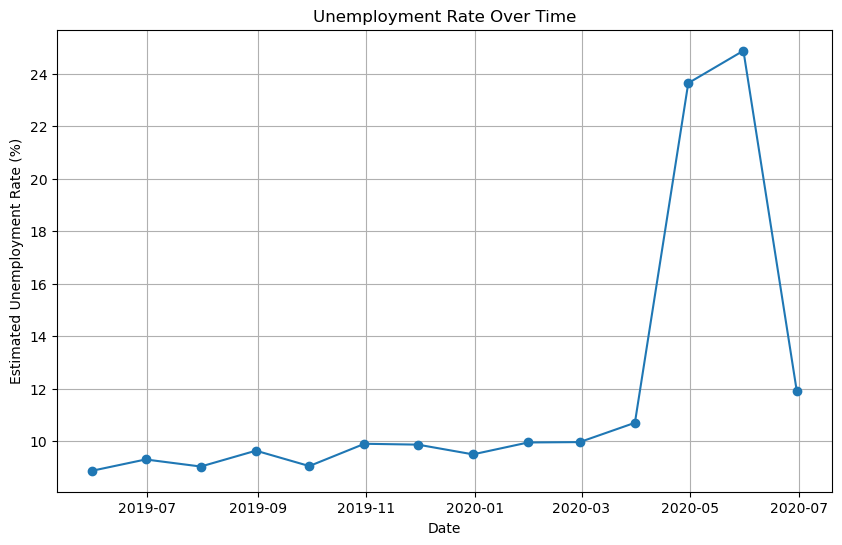

In [22]:
# Group the data by Date and calculate the mean unemployment rate for each date
mean_unemployment_over_time = df.groupby('Date')['Estimated Unemployment Rate (%)'].mean()

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(mean_unemployment_over_time.index, mean_unemployment_over_time.values, marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate Over Time')
plt.grid(True)

plt.show()

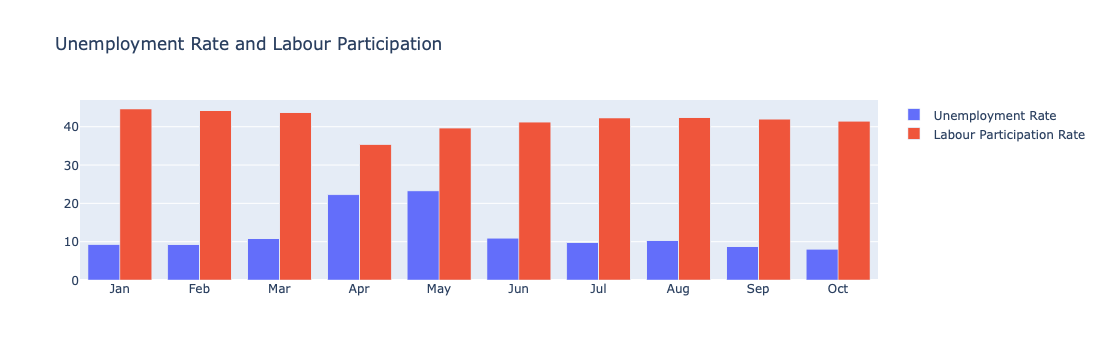

In [23]:
# Bar plot of unemployment rate and labour participation rate
month = dt.month
unemployment_rate = dt['estimated unemployment rate']
labour_participation_rate = dt['estimated labour participation rate']

fig = go.Figure()

fig.add_trace(go.Bar(x = month,y = unemployment_rate,name = 'Unemployment Rate'))
fig.add_trace(go.Bar(x = month,y = labour_participation_rate,name = 'Labour Participation Rate'))

fig.update_layout(title = 'Unemployment Rate and Labour Participation',
                     xaxis = {'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']}      )
fig.show()

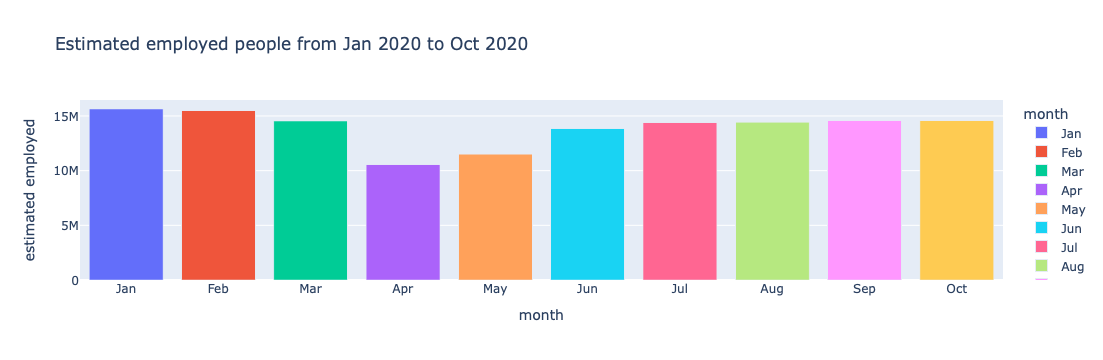

In [24]:
# Bar plot of estimated employed citizen in every month
fig = px.bar(dt, x='month', y='estimated employed', color= 'month',
            category_orders ={'month':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']},
            title='Estimated employed people from Jan 2020 to Oct 2020')
fig.show()

## State wise Analysis

In [26]:
state =  data.groupby(['state'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
state = pd.DataFrame(state).reset_index()

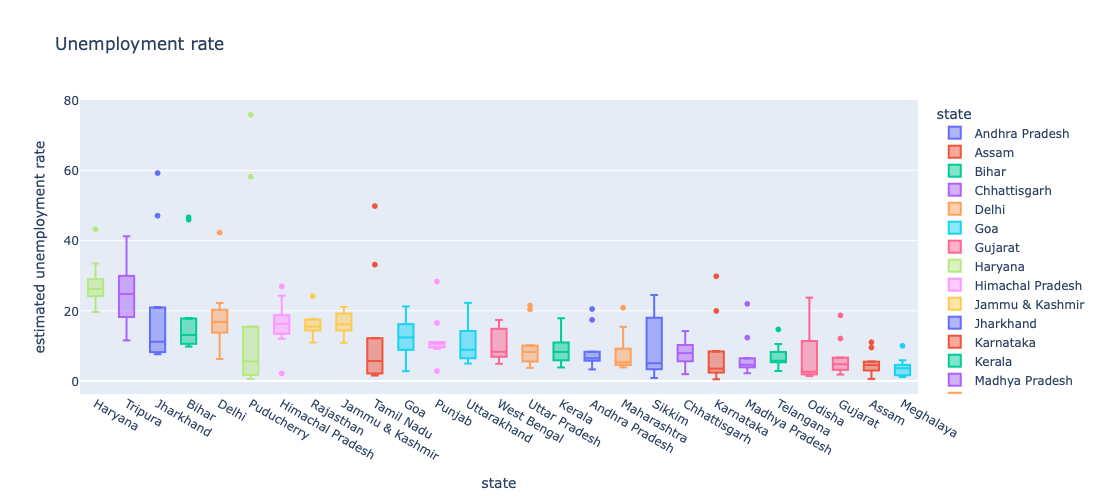

In [27]:
# Box plot
fig = px.box(data_frame=data, x='state', y='estimated unemployment rate', color='state', title='Unemployment rate')
fig.update_layout(height=500, xaxis={'categoryorder':'total descending'})
fig.show()

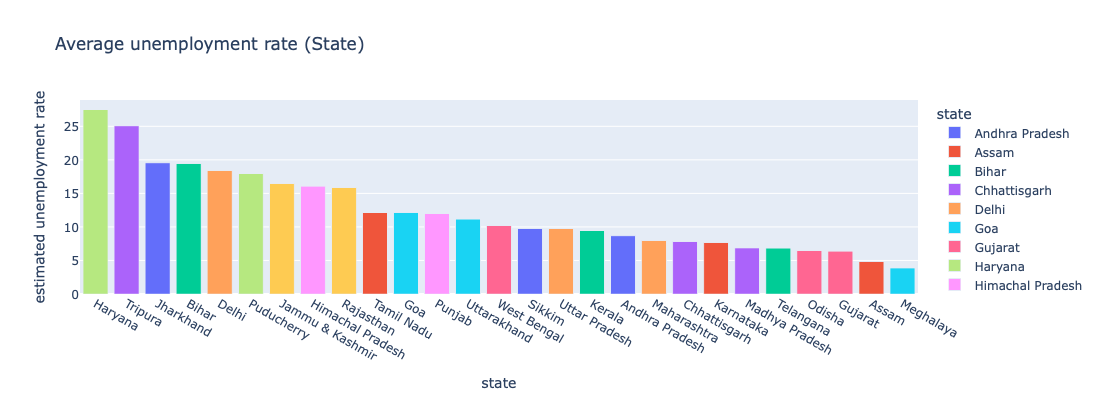

In [28]:
# Bar plot Unemployment Rate (Average)

fig = px.bar(state, x='state', y='estimated unemployment rate', color='state', title='Average unemployment rate (State)')
fig.update_layout(height=400, xaxis={'categoryorder':'total descending'})
fig.show()

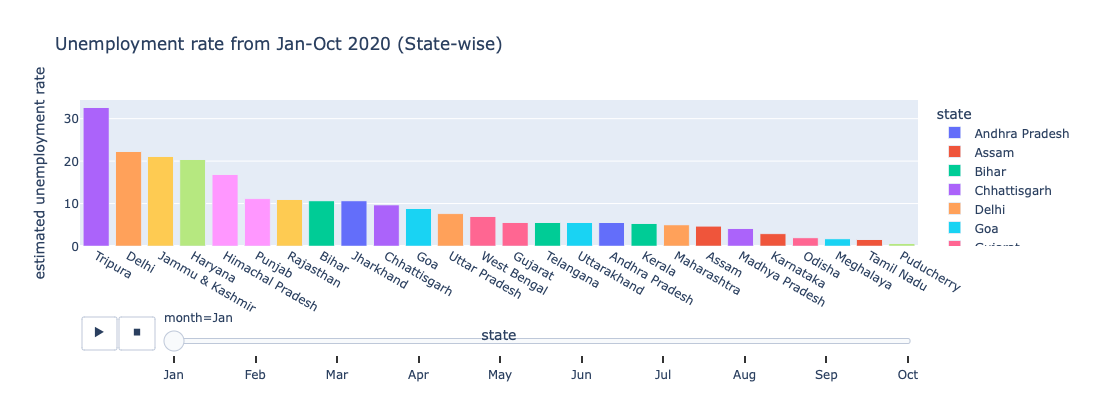

In [29]:
# Bar plot Unemployment Rate (Monthly)

fig = px.bar(data, x='state', y='estimated unemployment rate', animation_frame='month', color='state',
            title='Unemployment rate from Jan-Oct 2020 (State-wise)')

fig.update_layout(height=400, xaxis={'categoryorder':'total descending'})
fig.show()

## Monthly Analysis

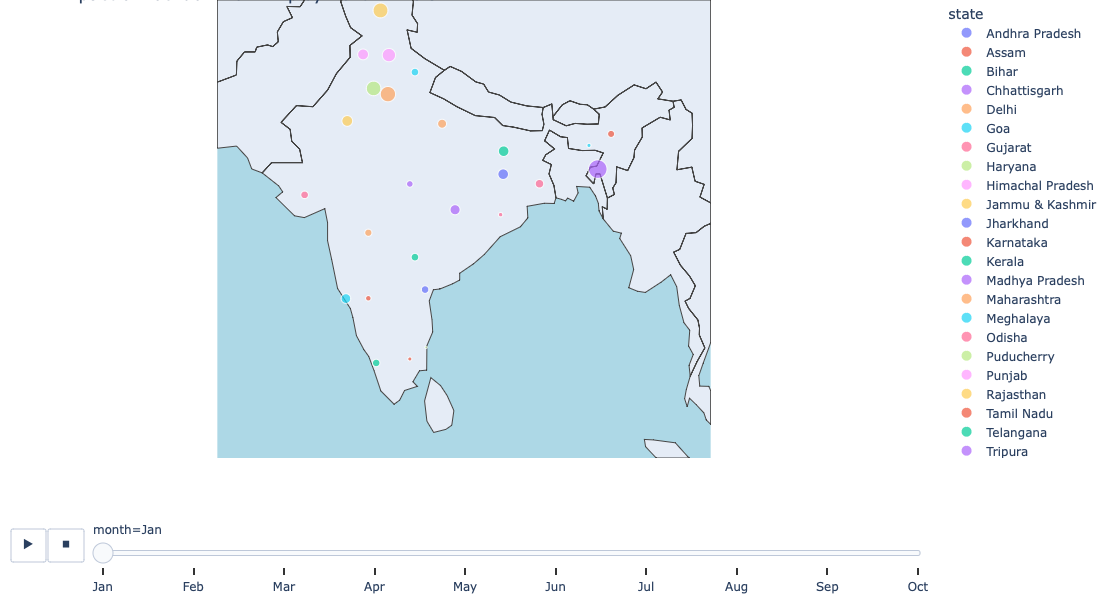

In [31]:
fig=px.scatter_geo(data, 'longitude','latitude', color='state', hover_name='state',
                   size='estimated unemployment rate', animation_frame='month', 
                   scope='asia', title='Impact of Lockdown on Employment in India')

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =1000
fig.update_geos(lataxis_range=[5,35],lonaxis_range=[65,100],oceancolor='lightblue', showocean=True)
fig.update_layout(height=600, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Regional Analysis

In [33]:
#Total regions in India
data.region.unique()

array(['South', 'Northeast', 'East', 'West', 'North'], dtype=object)

###   (i) Numeric data grouped by Region 

In [35]:
region = data.groupby(['region'])[['estimated unemployment rate','estimated employed','estimated labour participation rate']].mean()
region = pd.DataFrame(region).reset_index()

<Axes: >

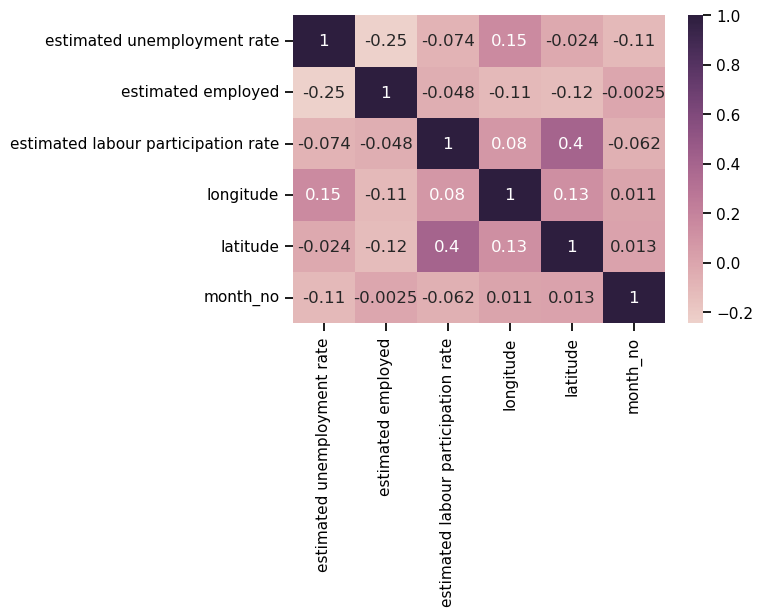

In [36]:
# Heatmap
hm = data[['estimated unemployment rate','estimated employed','estimated labour participation rate', 'longitude', 'latitude', 'month_no']]
hm = hm.corr()
plt.figure(figsize=(6,4))
sns.set_context('notebook', font_scale=1)
sns.heatmap(data=hm, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

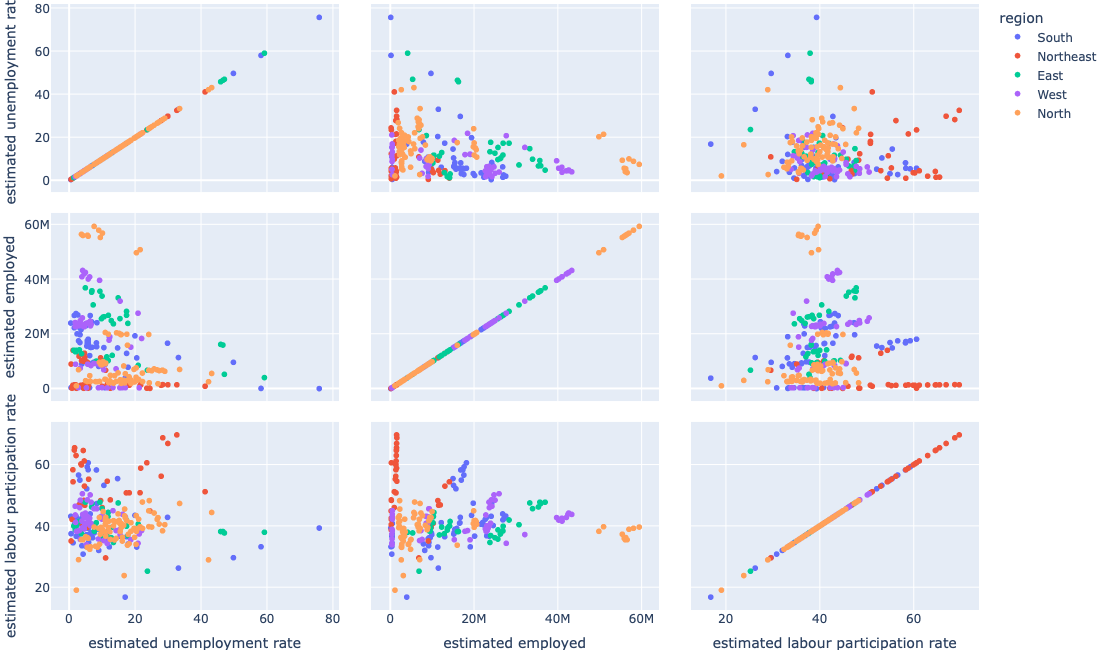

In [37]:
#Scatter plot

fig= px.scatter_matrix(data, dimensions=['estimated unemployment rate','estimated employed','estimated labour participation rate'], color='region')
fig.update_layout(height=650, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

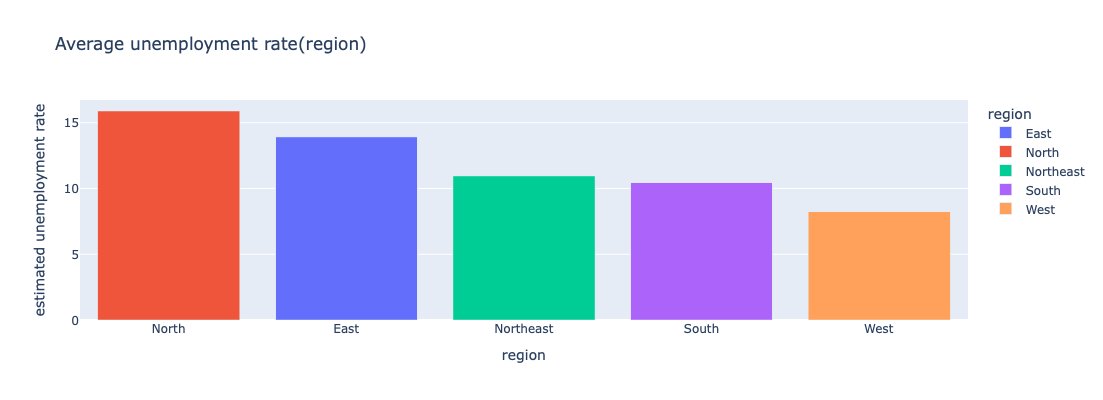

In [38]:
# Average Unemployment Rate

fig = px.bar(region,x='region',y='estimated unemployment rate',color='region',title='Average unemployment rate(region)')
fig.update_layout(height=400, xaxis={'categoryorder':'total descending'})
fig.show()

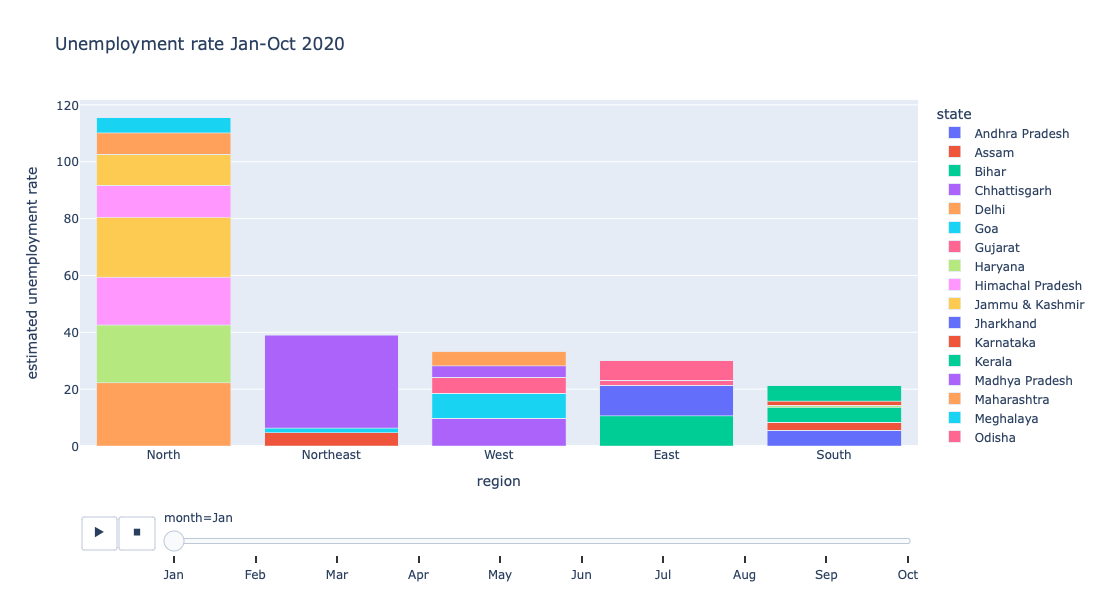

In [39]:
fig = px.bar(data, x='region', y='estimated unemployment rate', animation_frame='month',
             title='Unemployment rate Jan-Oct 2020', color='state')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] =1500
fig.update_layout(height=600)
fig.show()

###   (ii) Numeric data grouped by State 

In [41]:
unemployment =data.groupby(['region','state'])['estimated unemployment rate'].mean().reset_index()

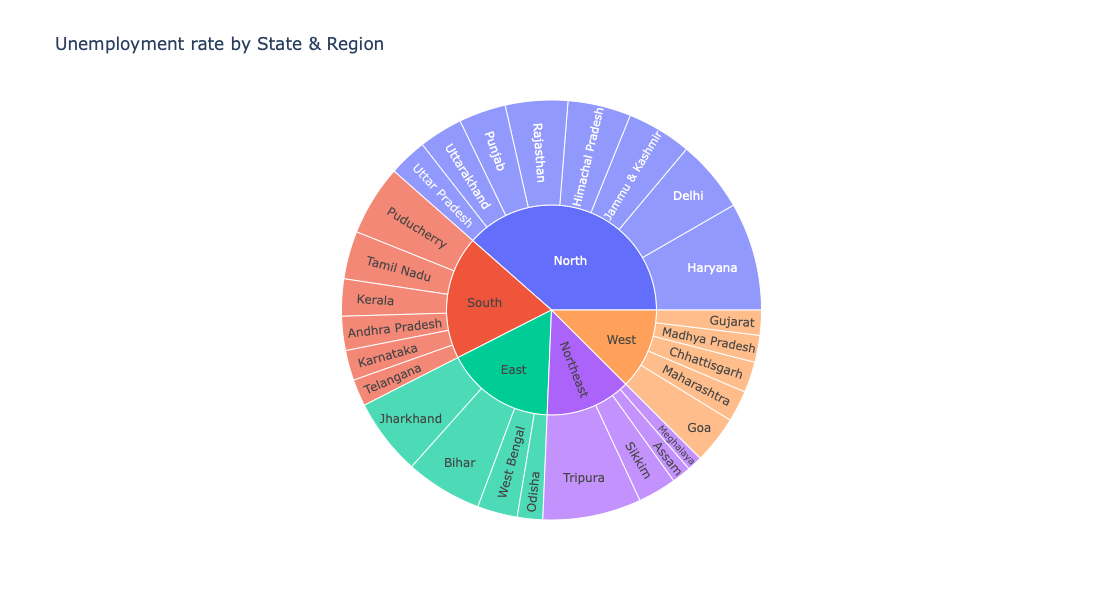

In [42]:
# Sunburst plot
fig = px.sunburst(unemployment, path=['region','state'], values='estimated unemployment rate',
                 title ='Unemployment rate by State & Region', height=600)
fig.show()

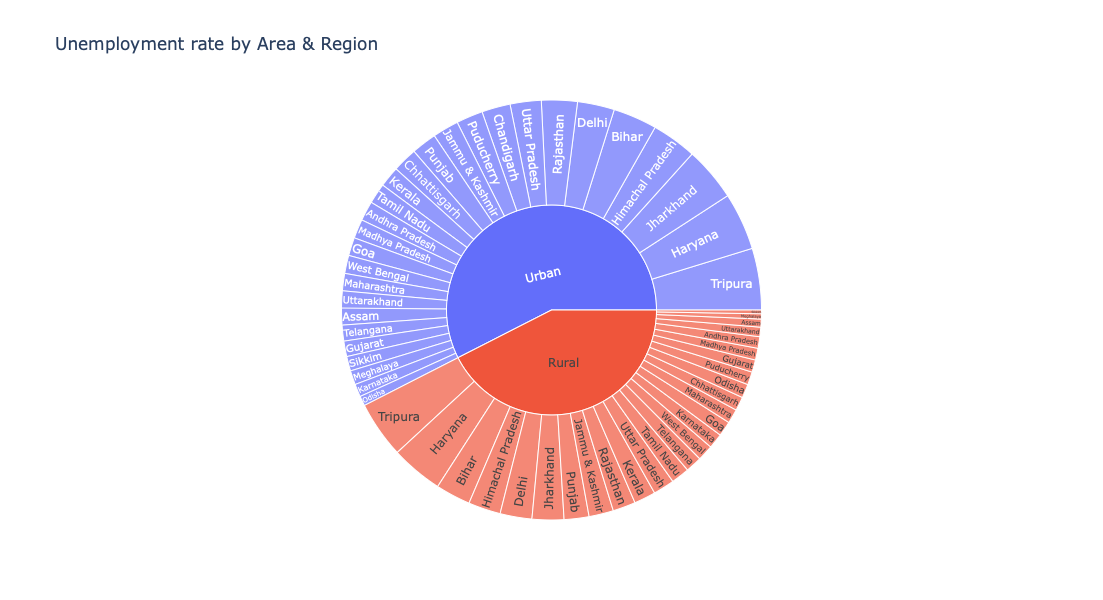

In [43]:
fig = px.sunburst(df, path=['Area', 'Region'], values='Estimated Unemployment Rate (%)', title='Unemployment rate by Area & Region', height=600)
fig.show()

## Correlation Analysis

In [45]:
# Correlation matrix calculation
correlation = df[['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']].corr()
print(correlation)

                                         Estimated Unemployment Rate (%)  \
Estimated Unemployment Rate (%)                                 1.000000   
Estimated Employed                                             -0.222876   
Estimated Labour Participation Rate (%)                         0.002558   

                                         Estimated Employed  \
Estimated Unemployment Rate (%)                   -0.222876   
Estimated Employed                                 1.000000   
Estimated Labour Participation Rate (%)            0.011300   

                                         Estimated Labour Participation Rate (%)  
Estimated Unemployment Rate (%)                                         0.002558  
Estimated Employed                                                      0.011300  
Estimated Labour Participation Rate (%)                                 1.000000  


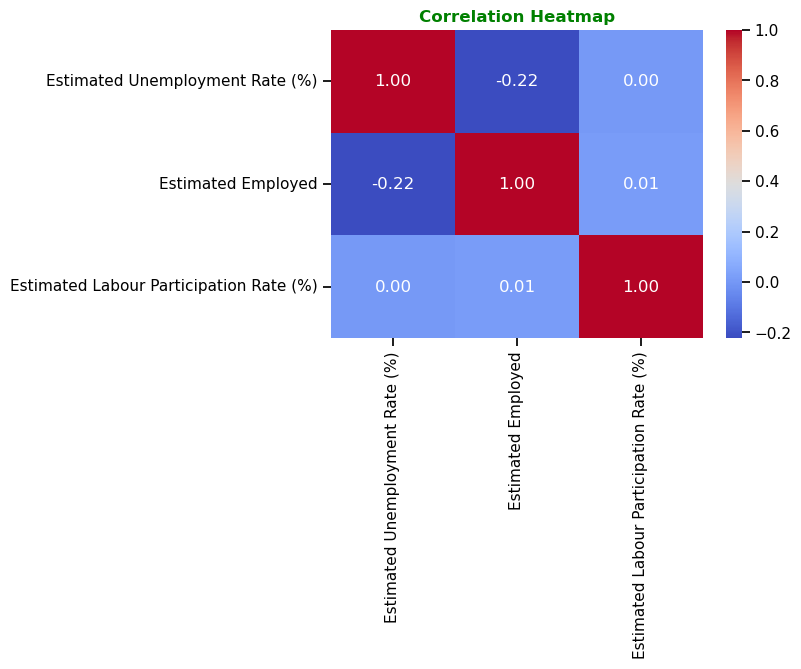

In [46]:
# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', weight='bold', color='green')
plt.show()

## Unemployment rate before and after Lockdown

In [48]:
df['month_int'] = df['Date'].dt.month
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [49]:
df_ld = df.copy()

# Before lockdown period
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-31')
df = df.loc[mask]

# During lockdown period
mask = (df_ld['Date'] >= '2020-04-30')
df_ld = df_ld.loc[mask]

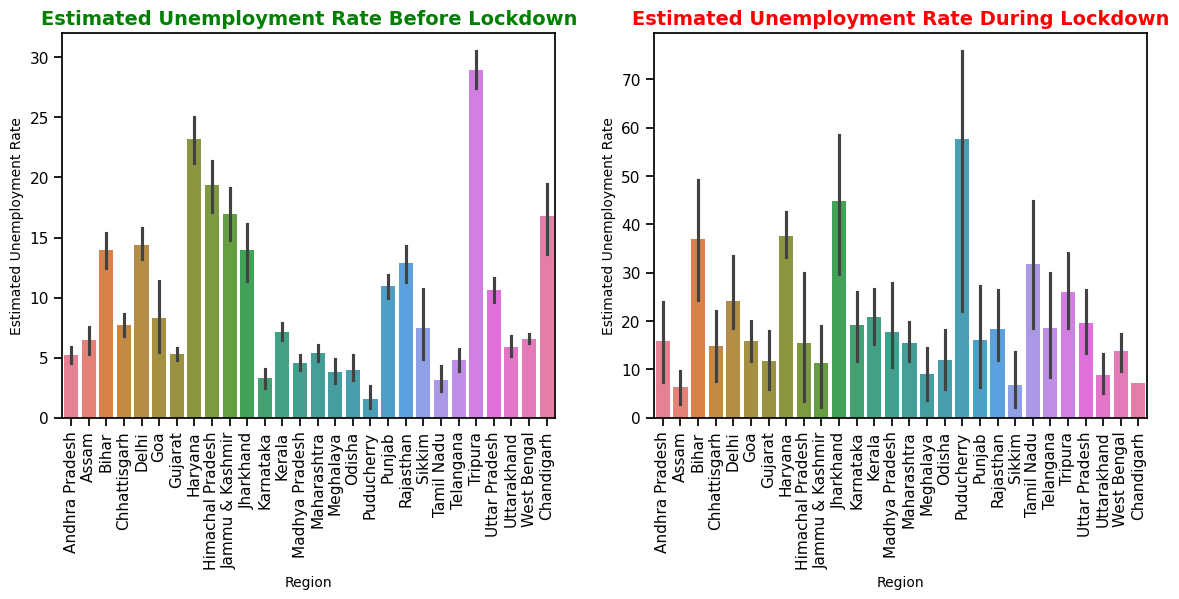

In [50]:
# Create a figure with two subplots side by side.
plt.figure(figsize=(14, 5))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df, hue=df['Region'])

# Set labels and title for the first subplot.
plt.xticks(rotation=90)
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=14, weight='bold', color='green')
# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data=df_ld, hue=df_ld['Region'])

# Set labels and title for the second subplot.
plt.xticks(rotation=90)
plt.xlabel("Region", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=14, weight='bold', color='red')

# Display the subplots side by side.
plt.show()